In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [25]:
url = "https://raw.githubusercontent.com/JAMPaulol/finals/main/Smartphone%20Comparative%20Analysis%202015-2024.csv"
df = pd.read_csv(url)

df.head()


,Brand,Year,Quarter,Units_Shipped_Million,Revenue_Billion_USD,Average_Selling_Price,Market_Share_Percent,R&D_Expenditure_Billion
0,Samsung,2015,Q1,46.22,44.51,963.04,24.64,1.58
1,Samsung,2015,Q2,30.92,11.35,367.00,11.16,2.19
2,Samsung,2015,Q3,62.08,48.49,781.05,10.41,2.43
3,Samsung,2015,Q4,78.27,32.03,409.25,13.64,0.62
4,Samsung,2016,Q1,41.30,26.58,643.57,18.64,0.87


In [26]:
# Drop nulls
df_clean = df.dropna()


print("Number of Rows:", len(df_clean))
print("Null Values:\n", df_clean.isnull().sum())


Number of Rows: 160
Null Values:
 Brand                      0
Year                       0
Quarter                    0
Units_Shipped_Million      0
Revenue_Billion_USD        0
Average_Selling_Price      0
Market_Share_Percent       0
R&D_Expenditure_Billion    0
dtype: int64


In [27]:
# Check for at least 100 data points
assert len(df_clean) >= 100, "Dataset must have at least 100 entries after cleaning"
print("Dataset is clean and contains at least 100 data points.")


Dataset is clean and contains at least 100 data points.


In [28]:
units_array = df_clean["Units_Shipped_Million"].values
revenue_array = df_clean["Revenue_Billion_USD"].values

print("\nNumPy Operations:")
print("Mean Units Shipped:", np.mean(units_array))
print("Median Units Shipped:", np.median(units_array))
print("Std Dev Units Shipped:", np.std(units_array))
print("Max Revenue:", np.max(revenue_array))
print("Min Revenue:", np.min(revenue_array))



NumPy Operations:
Mean Units Shipped: 41.98225
Median Units Shipped: 38.135
Std Dev Units Shipped: 21.73719735125713
Max Revenue: 82.87
Min Revenue: 3.56


In [29]:
if "Apple" in df_clean["Brand"].unique() and "Xiaomi" in df_clean["Brand"].unique():
    apple_units = df_clean[df_clean["Brand"] == "Apple"]["Units_Shipped_Million"]
    xiaomi_units = df_clean[df_clean["Brand"] == "Xiaomi"]["Units_Shipped_Million"]
    
    if len(apple_units) > 1 and len(xiaomi_units) > 1:
        t_stat, p_val = ttest_ind(apple_units, xiaomi_units, equal_var=False)
        print("\n🔬 T-Test (Apple vs Xiaomi):")
        print("T-Statistic:", t_stat)
        print("P-Value:", p_val)
    else:
        print("Not enough data for Apple or Xiaomi for t-test.")
else:
    print("Apple or Xiaomi not found in the dataset.")



🔬 T-Test (Apple vs Xiaomi):
T-Statistic: 7.822626489376201
P-Value: 6.044635660927274e-11


In [30]:
df_reg = df_clean[["Average_Selling_Price", "Units_Shipped_Million"]].dropna()

if len(df_reg) > 10:
    model = smf.ols("Units_Shipped_Million ~ Average_Selling_Price", data=df_reg).fit()
    print("\nRegression Summary:\n")
    print(model.summary())
else:
    print("Not enough data for regression.")



Regression Summary:

                              OLS Regression Results                             
Dep. Variable:     Units_Shipped_Million   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.006
Method:                    Least Squares   F-statistic:                   0.05703
Date:                   Wed, 28 May 2025   Prob (F-statistic):              0.812
Time:                           15:40:37   Log-Likelihood:                -719.65
No. Observations:                    160   AIC:                             1443.
Df Residuals:                        158   BIC:                             1449.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

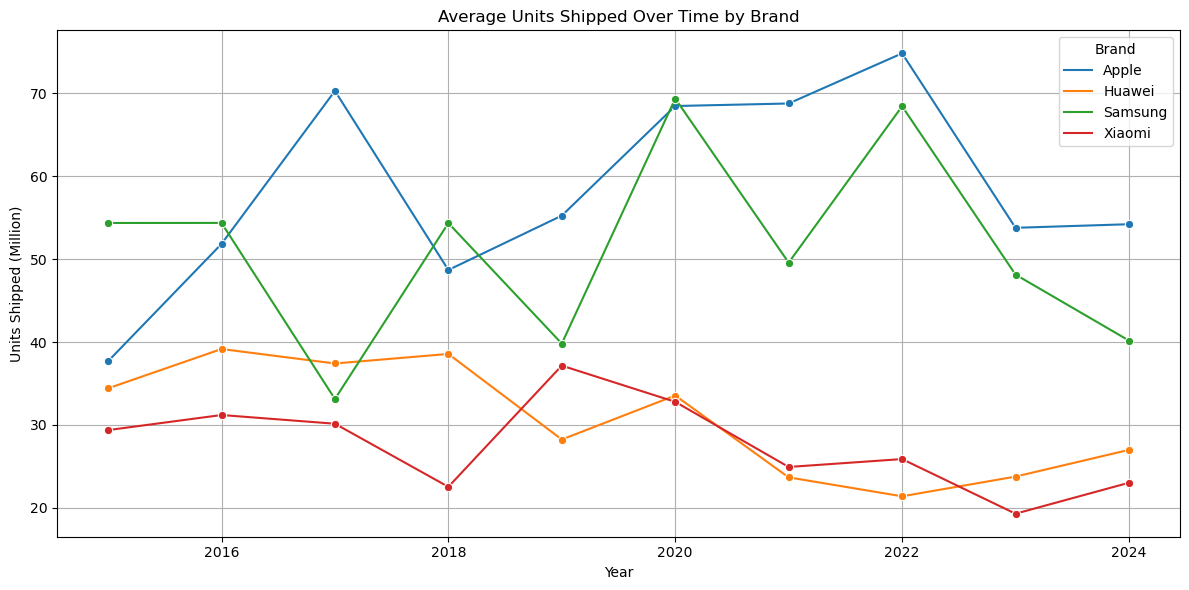

In [31]:
df_yearly_units = (
    df_clean.groupby(["Brand", "Year"])["Units_Shipped_Million"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly_units, x="Year", y="Units_Shipped_Million", hue="Brand", marker="o")
plt.title("Average Units Shipped Over Time by Brand")
plt.ylabel("Units Shipped (Million)")
plt.grid(True)
plt.tight_layout()
plt.show()


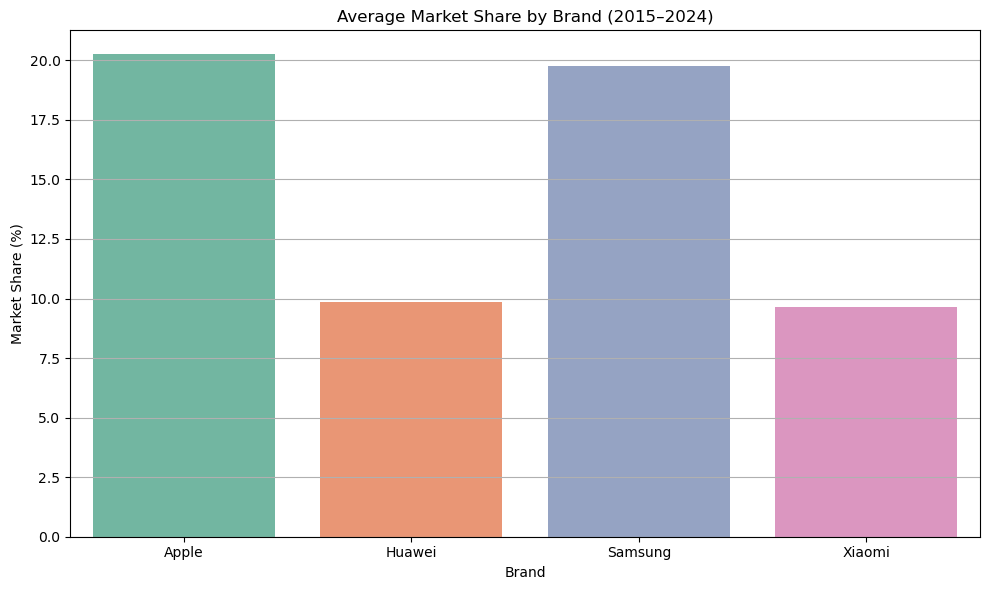

In [32]:
market_share_avg = df_clean.groupby("Brand")["Market_Share_Percent"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=market_share_avg, x="Brand", y="Market_Share_Percent", palette="Set2")
plt.title("Average Market Share by Brand (2015–2024)")
plt.ylabel("Market Share (%)")
plt.xlabel("Brand")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_325/3147203162.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


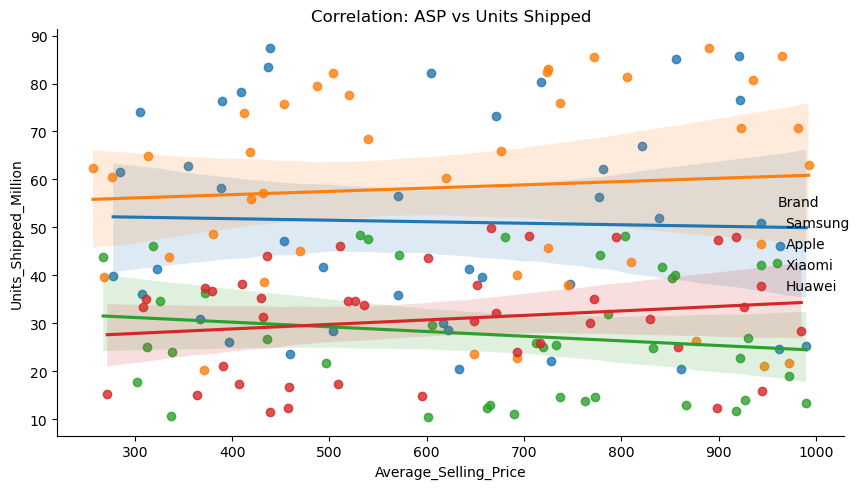

In [34]:
sns.lmplot(data=df_clean, x="Average_Selling_Price", y="Units_Shipped_Million", hue="Brand", aspect=1.5)
plt.title("Correlation: ASP vs Units Shipped")
plt.tight_layout()
plt.show()
